# Prediction and Classification of the Physicochemical Properties of Protein Tertiary Structure 
----------------------

## Context

Protein tertiary structure prediction is a field of research aimed at creating models and computational tools capable of predicting the three-dimensional shape of protein molecules by describing the spatial arrangement of each of their atoms from the sequence of their amino acids.

Proteins play an important role in the maintenance of life. The study of the tertiary structure of proteins contributes to their function and is also used for drug design and drug discovery.
The physicochemical properties of amino acids and their solvent environment are the determining factors in the folding of a protein sequence into its unique tertiary structure.

A common study technique for the prediction of tertiary structures of unknown proteins is to extrapolate them according to their groups and properties, so that a protein with similar characteristics that has not been studied is very likely to have a similar structure to the protein family whose properties are similar.


## Objetive

_ Clasify  the protein tertiary structure based on its physicochemical property(RSMD)
- Predict the protein tertiary structure based on its physicochemical property(Size)



---------------------

This is a data set of Physicochemical Properties of Protein Tertiary Structure. The data set is taken from CASP 5-9. There are 45730 decoys and size varying from 0 to 21 armstrong.

- Data Set Characteristics: Multivariate

- Number of Instances:45730

- Area:Life

- Attribute Characteristics:Real

- Number of Attributes:9

- Date Donated:2013-03-31

- Associated Tasks:Regression

- Missing Values?:N/A


---

[Physicochemical Properties of Protein Tertiary Structure Data Set](https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure#)



-------------------
- Name :Juan Felipe Cardona Arango
- id: 1035428859
- Course: Electiva I: Aprendizaje de Máquina
- Asesor: Sebastian 
- Date: 10/05/2023

In [36]:
# data manipulation
import pandas as pd
import numpy as np

# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# apply some cool styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12, 6)


In [25]:
df=pd.read_csv("/Users/juanfelipearango/Documents/Documentos - iMac de Juan/IU digital/CASP.csv")

### Attribute Information:

- RMSD-Size of the residue.
- F1 - Total surface area.
- F2 - Non polar exposed area.
- F3 - Fractional area of exposed non polar residue.
- F4 - Fractional area of exposed non polar part of residue.
- F5 - Molecular mass weighted exposed area.
- F6 - Average deviation from standard exposed area of residue.
- F7 - Euclidian distance.
- F8 - Secondary structure penalty.
- F9 - Spacial Distribution constraints (N,K Value)

----------------

These attributes are structural features of proteins that are commonly used in the prediction of protein stability and the stability of protein-protein interactions.

- RMSD (Root Mean Square Deviation): A measure of the deviation of the atomic positions of a protein from its reference structure. The size of the residue refers to the size of the amino acids that make up the protein.

- F1 (Total surface area): The total amount of exposed surface area of a protein.

- F2 (Non-polar exposed area): It is the amount of exposed area corresponding to the non-polar groups of the protein.

- F3 (Fraction of non-polar exposed area): It is the fraction of exposed surface area corresponding to the non-polar groups of the protein.

- F4 (Non-polar exposed area fraction of the protein): The fraction of the total surface area that corresponds to the non-polar groups of the protein.

- F5 (Area weighted by the exposed molecular mass): It is the product of the exposed surface area of a residue and the molecular mass of the residue.

- F6 (Average deviation of the standard exposed area of the residue): It is the average deviation of the exposed surface area of a residue from a standard value.

- F7 (Euclidean distance): A measure of the distance in three-dimensional space between two points.

- F8 (Secondary structure penalty): This is a penalty applied to residues that are in specific secondary structures, as they have been shown to have a lower surface exposure.

- F9 (Spatial distribution constraints (N,K value)): These are constraints that apply to the spatial distribution of residues in a protein, based on the distribution of similar residues in proteins of known structures. The N-value indicates the number of nearby residues taken into account and K indicates the number of amino acid types taken into account.

In [26]:
colnames=df.columns.values
print(colnames)

['RMSD' 'F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9']


In [27]:

type(df)

pandas.core.frame.DataFrame

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [29]:
df.shape

(45730, 10)

In [30]:
df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


Replacing the header of the titles

In [31]:
titulos=["Size","Total_Surface","Exposed_area","FAEPR","FAENPR","MMEA","ASDT","ED","SP","SDC"]
df.columns=titulos
df.head()

,Size,Total_Surface,Exposed_area,FAEPR,FAENPR,MMEA,ASDT,ED,SP,SDC
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [7]:
df.isnull().sum()

RMSD    0
F1      0
F2      0
F3      0
F4      0
F5      0
F6      0
F7      0
F8      0
F9      0
dtype: int64

In [32]:
df.corr(method='spearman')

,Size,Total_Surface,Exposed_area,FAEPR,FAENPR,MMEA,ASDT,ED,SP,SDC
Size,1.000000,-0.009582,0.162299,0.389039,-0.145833,-0.012447,-0.023139,-0.028618,0.076449,0.062095
Total_Surface,-0.009582,1.000000,0.893122,0.131872,0.937524,0.997821,0.964447,0.919873,0.596608,-0.919616
Exposed_area,0.162299,0.893122,1.000000,0.535850,0.806998,0.889149,0.911434,0.816426,0.574048,-0.799502
FAEPR,0.389039,0.131872,0.535850,1.000000,0.050070,0.127898,0.226711,0.111367,0.144056,-0.070620
FAENPR,-0.145833,0.937524,0.806998,0.050070,1.000000,0.933307,0.932820,0.870806,0.593563,-0.908975
MMEA,-0.012447,0.997821,0.889149,0.127898,0.933307,1.000000,0.957067,0.917395,0.591815,-0.917966
ASDT,-0.023139,0.964447,0.911434,0.226711,0.932820,0.957067,1.000000,0.891231,0.612989,-0.898222
ED,-0.028618,0.919873,0.816426,0.111367,0.870806,0.917395,0.891231,1.000000,0.577699,-0.915577
SP,0.076449,0.596608,0.574048,0.144056,0.593563,0.591815,0.612989,0.577699,1.000000,-0.588234
SDC,0.062095,-0.919616,-0.799502,-0.070620,-0.908975,-0.917966,-0.898222,-0.915577,-0.588234,1.000000


<Axes: >

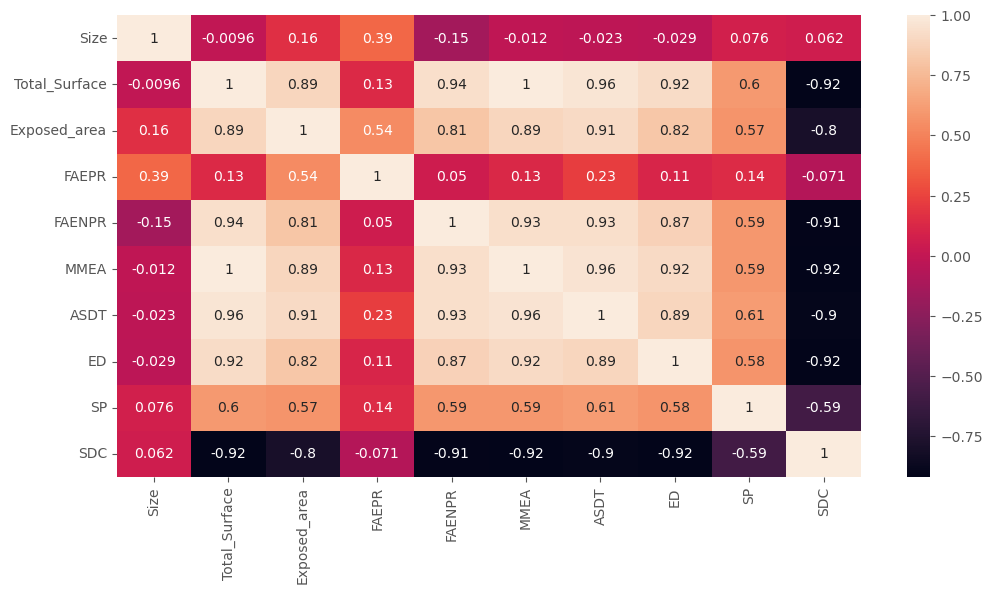

In [33]:
sns.heatmap(df.corr(method='spearman'),annot=True )

## Observations

- no processing of missing data 
- no data imputation necessary
- no transformation of categorical data to be performed
- in this case the data has not yet been normalized, so an initial approximation is made with the sperman correlation.


however, what we want to create, is a colored map that shows the strength of the correlation between every independent variable that we want to include in our model and the dependent variable.

The following code returns the correlation of all features with ‘Size’, a single, dependent variable, sorted by in a descending manner

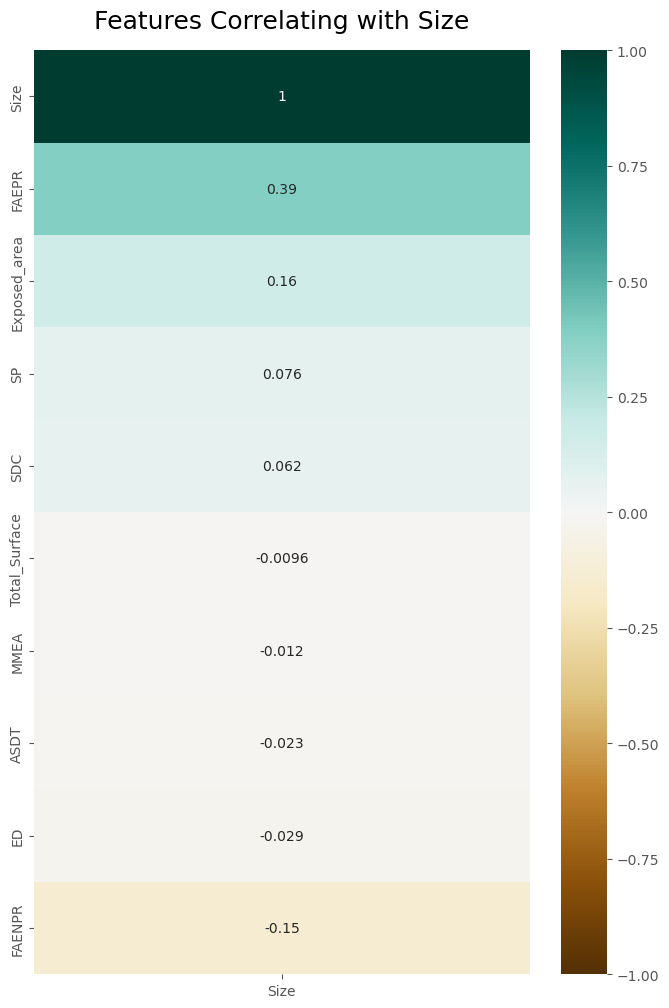

In [34]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr(method='spearman')[['Size']].sort_values(by='Size', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Size', fontdict={'fontsize':18}, pad=16);

## Univariate Analysis

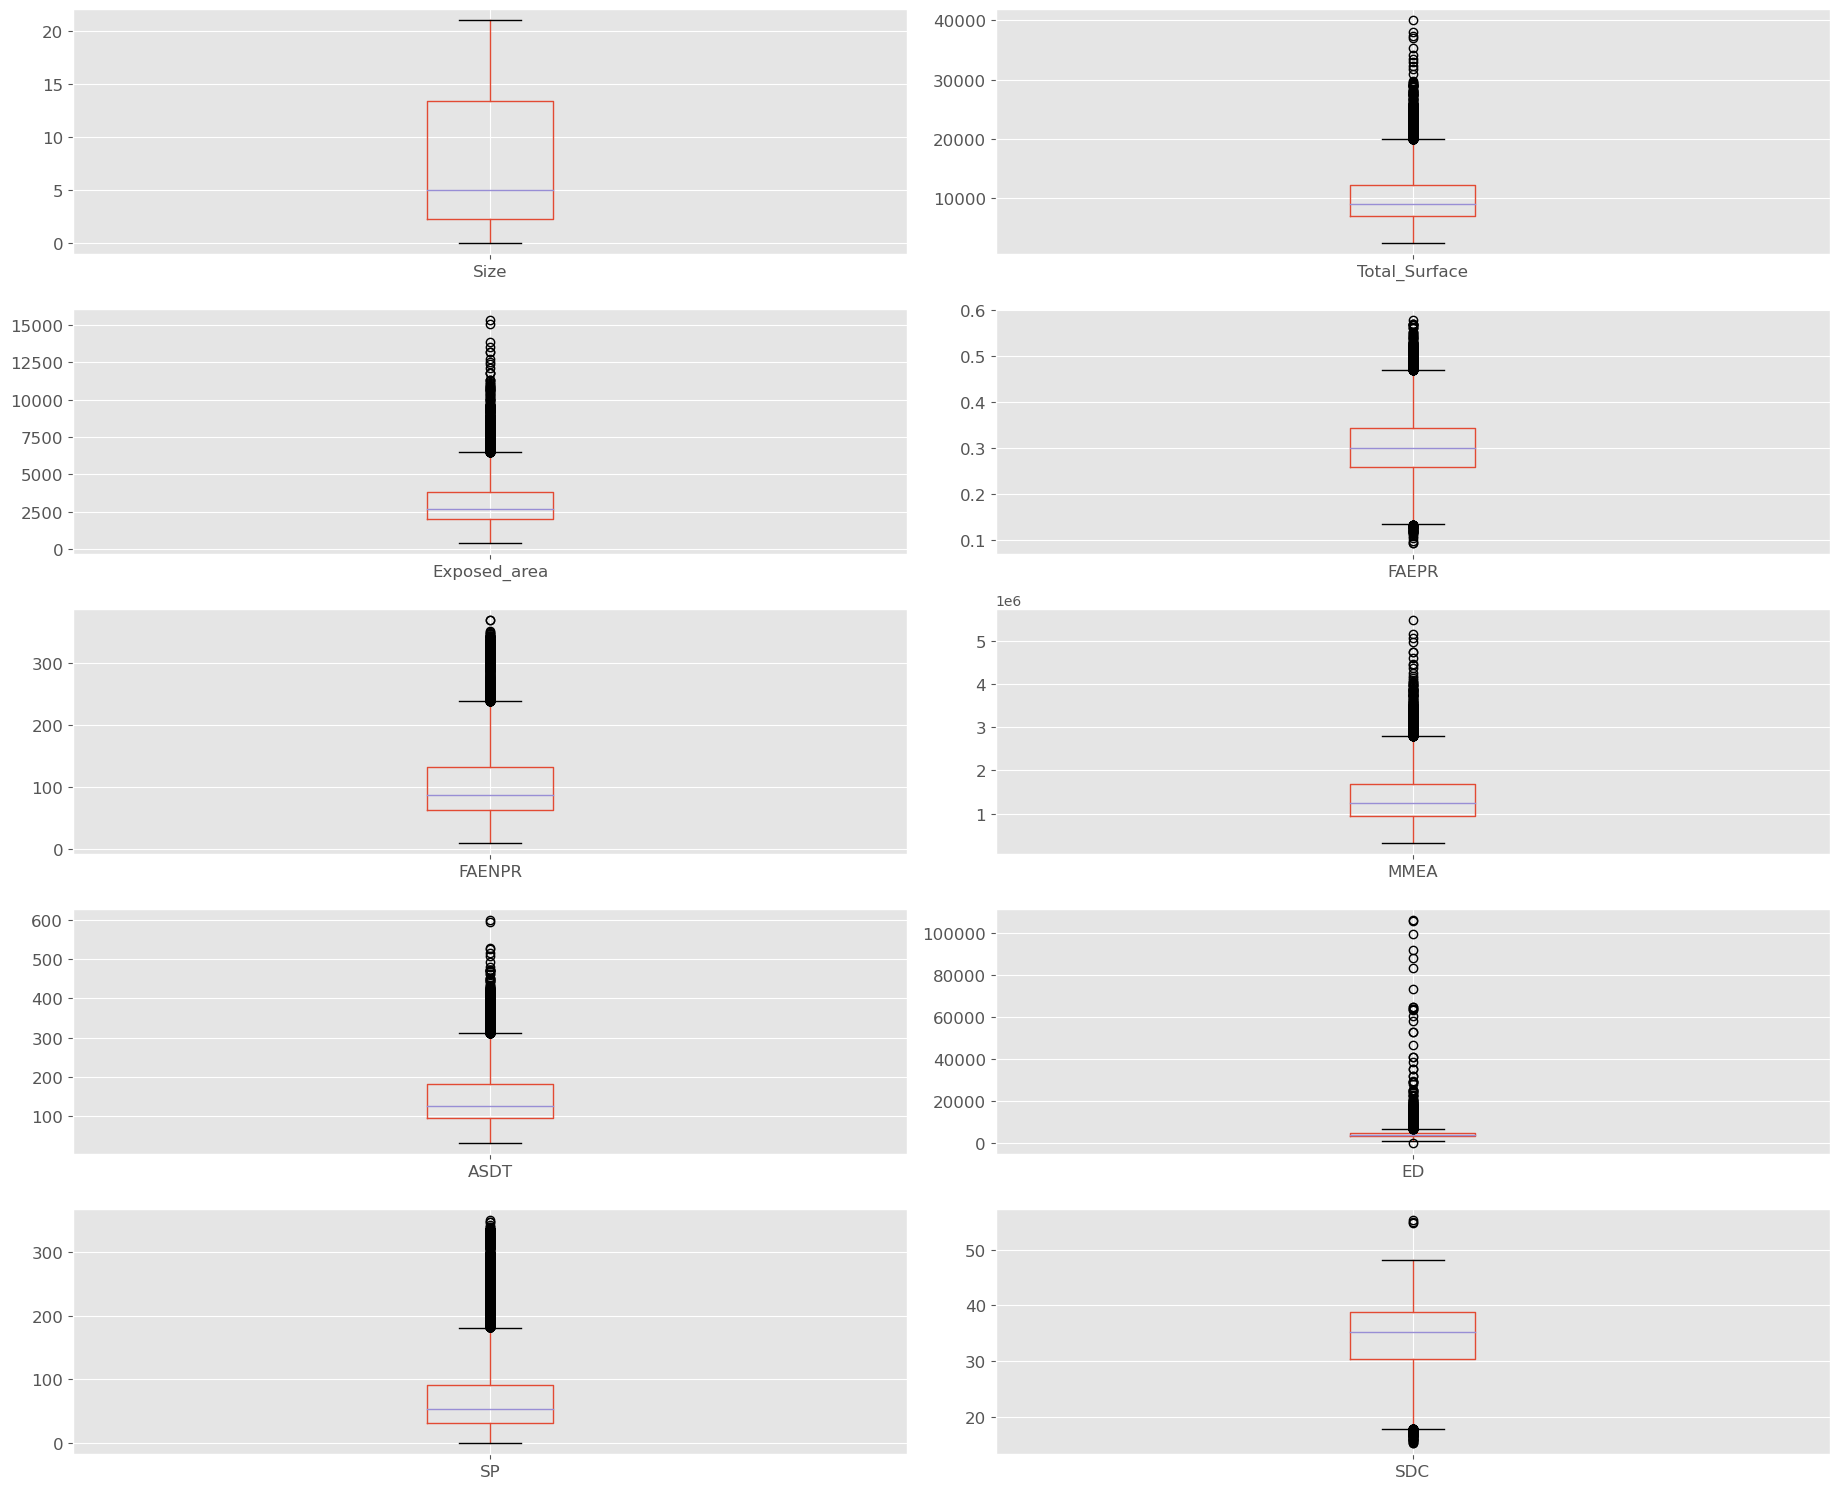

In [ ]:
fig, axes = plt.subplots(5,2) # create figure and axes

for i, el in enumerate(list(df[titulos].columns.values)):
  a = df.boxplot(el, ax=axes.flatten()[i], fontsize='large')

fig.set_size_inches(18.5, 15)
plt.tight_layout() 

plt.show()

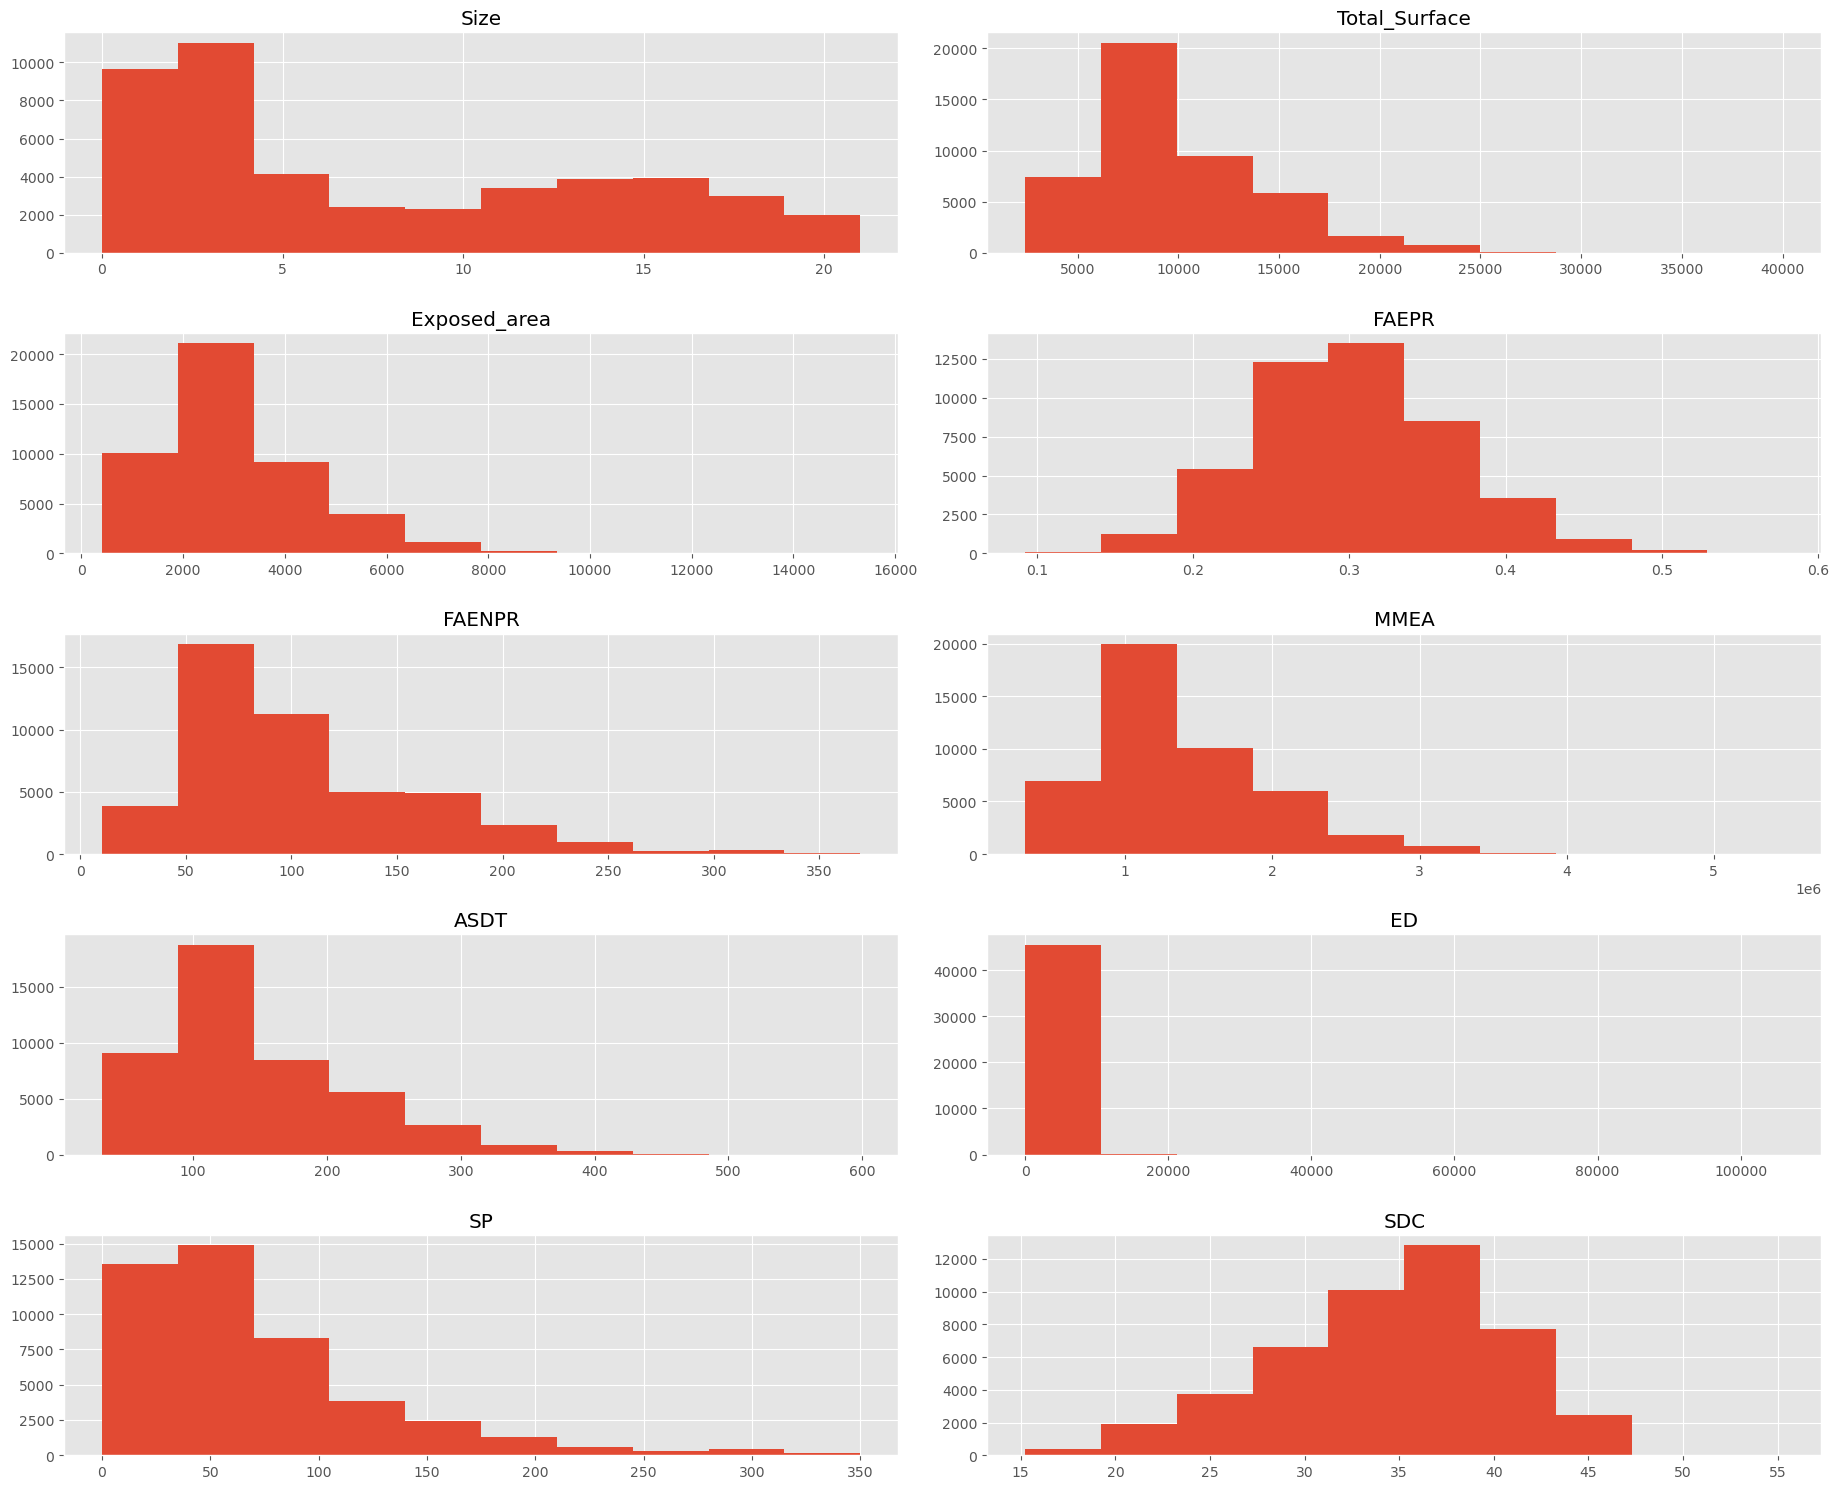

In [ ]:
fig, axes = plt.subplots(5,2) # create figure and axes

for i, el in enumerate(list(df[titulos].columns.values)):
  a = df.hist(el, ax=axes.flatten()[i])

fig.set_size_inches(18.5, 15)
plt.tight_layout() 

plt.show()